In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# lets have a quick look at the data file structure
base_dir = '/kaggle/input/tomatoleaf/tomato'
for directory in os.listdir(base_dir):
    print(f'The parent directory is {base_dir}/{directory}')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The parent directory is /kaggle/input/tomatoleaf/tomato/cnn_train.py
The parent directory is /kaggle/input/tomatoleaf/tomato/val
The parent directory is /kaggle/input/tomatoleaf/tomato/train


## To combine a Convolutional Neural Network (CNN) with Support Vector Machine (SVM) in TensorFlow, you can use the following steps:

1. Train a CNN model on your image dataset using TensorFlow's high-level Keras API. You can use pre-trained models such as VGG,  ResNet, or Inception, or you can build your own CNN from scratch.
2. Extract the bottleneck features from the CNN model. Bottleneck features are the output of the last convolutional layer of the CNN model, which captures the high-level image features. You can use the predict method of the trained CNN model to obtain the bottleneck features for each image in your dataset.
3. Train an SVM model on the bottleneck features using TensorFlow's LinearSVC or SVC classes. These classes implement linear or non-linear SVMs, respectively. You can use the fit method of the SVM model to train it on the bottleneck features.
4. Evaluate the combined model on your test set. You can use the predict method of the trained SVM model to obtain the class predictions for each test image's bottleneck features.

## In The first part of the notebook we train the following
* A classifier with a 3X3 Filter size in the first convolution layer and a Fully connected layer of 10 classes at the end.
* A classifier with a 5X5 Filter size in the first convolution layer and a Fully connected layer of 10 classes at the end.
* A classifier with a 7X7 Filter size in the first convolution layer and a Fully connected layer of 10 classes at the end.

# Lets first preprocess the data

In [2]:
import tensorflow as tf
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_available

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


True

In [3]:
# function to find the number of categories in 
def calculate_categories_num(folder_dir):
    return len(os.listdir(folder_dir))

In [4]:
# the number of directories in the train and validation directory equals the number of categories
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

validation_categories = calculate_categories_num(validation_dir)
train_categories = calculate_categories_num(train_dir)

print(f'The number of categories in the validation directory is {validation_categories}')
print(f'The number of categories in the train directory is {train_categories}')

The number of categories in the validation directory is 10
The number of categories in the train directory is 10


In [5]:
# This means our dataset contains 38 different categories that need to be classified
# lets print this categories out
def print_categories(folder_dir):
    categories = []
    for direc in os.listdir(folder_dir):
        categories.append(direc)
        print(direc)
    return categories

In [6]:
print('TRAINING CATEGORIES')
train_cat = print_categories(train_dir)
print('VALIDATION CATEGORIES')
val_cat = print_categories(validation_dir)

TRAINING CATEGORIES
Tomato___Late_blight
Tomato___healthy
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite
VALIDATION CATEGORIES
Tomato___Late_blight
Tomato___healthy
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite


In [7]:
# as you can see from the results above train and validation categories are same 
# the can be validated by running a set union on both train_cat and val_cat and checking if the length of the
# union result is same as either of them

len({*train_cat}.union({*val_cat}))

10

In [8]:
# we would now find the number of images in each category and try to plot how much percentage they make up from the total number 
# of images in the dataset
def categories_percentage(folder_dir):
    cat_percent_dict = {}
    for direc in os.listdir(folder_dir):
            cat_percent_dict[f'{direc}'] = len(os.listdir(os.path.join(f'{folder_dir}',f'{direc}')))
    return cat_percent_dict

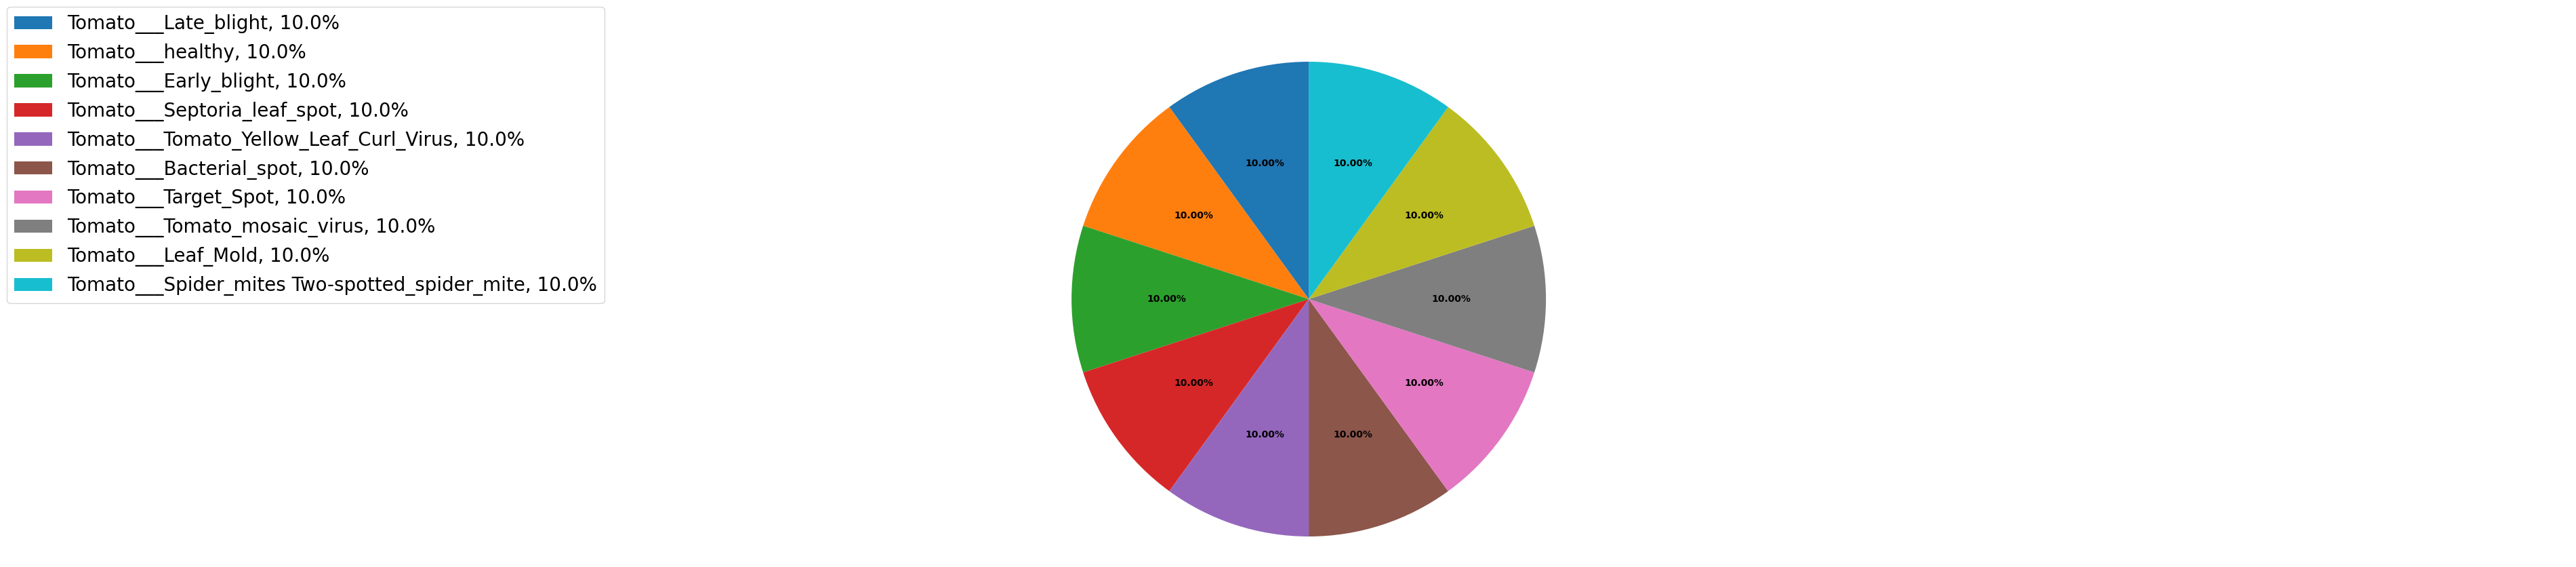

In [9]:
import matplotlib.pyplot as plt
import seaborn

train_cat_num = categories_percentage(train_dir)
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

#define Seaborn color palette to use
#palette_color = seaborn.color_palette('bright')
fig1, ax1 = plt.subplots(figsize=(6, 5))
box = box = ax1.get_position()
ax1.set_position([box.x0, box.y0-box.height, box.width * 8, box.height*2])
# plotting data on chart
_, _, autotexts = ax1.pie(
    train_cat_num.values(), autopct=autopct_generator(7), startangle=90, radius=4000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(train_cat_num.values())
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(train_cat_num.keys(), train_cat_num.values())],
    prop={'size': 20},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

#plt.pie(train_cat_num.values(), labels=train_cat_num.keys(), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
#plt.show()

In [10]:
import matplotlib.image as mpimg
w = 250
h = 250
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 4
num_choices = 20
# plot random images from train and validation dataset
# 'Potato___Late_blight'
def plot_category(folder_dir):
    fig = plt.figure(figsize=(15, 15))
    print(f'PLOTTING IMAGES IN {folder_dir}')
    random_train_image_directories = np.random.choice(os.listdir(os.path.join(train_dir,folder_dir)),num_choices)
    
    for i,img_dir in enumerate(random_train_image_directories):
        img = mpimg.imread(os.path.join(train_dir,folder_dir,img_dir))
        fig.add_subplot(rows, columns, i+1)
        imgplot = plt.imshow(img)
    plt.show()

<Figure size 1500x1500 with 0 Axes>

In [11]:
CLASS_NAMES = train_cat.copy()
#initialising necessary properties
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(10000/BATCH_SIZE)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
t =  f'{base_dir}/train'
v = f'{base_dir}/val'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
# training data generator
train_generator = train_datagen.flow_from_directory(
        t,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = list(CLASS_NAMES),
       # subset='training'
)
# validation data generator
validation_generator = test_datagen.flow_from_directory(
        v,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = list(CLASS_NAMES),
        batch_size=BATCH_SIZE,
        #subset='training'
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


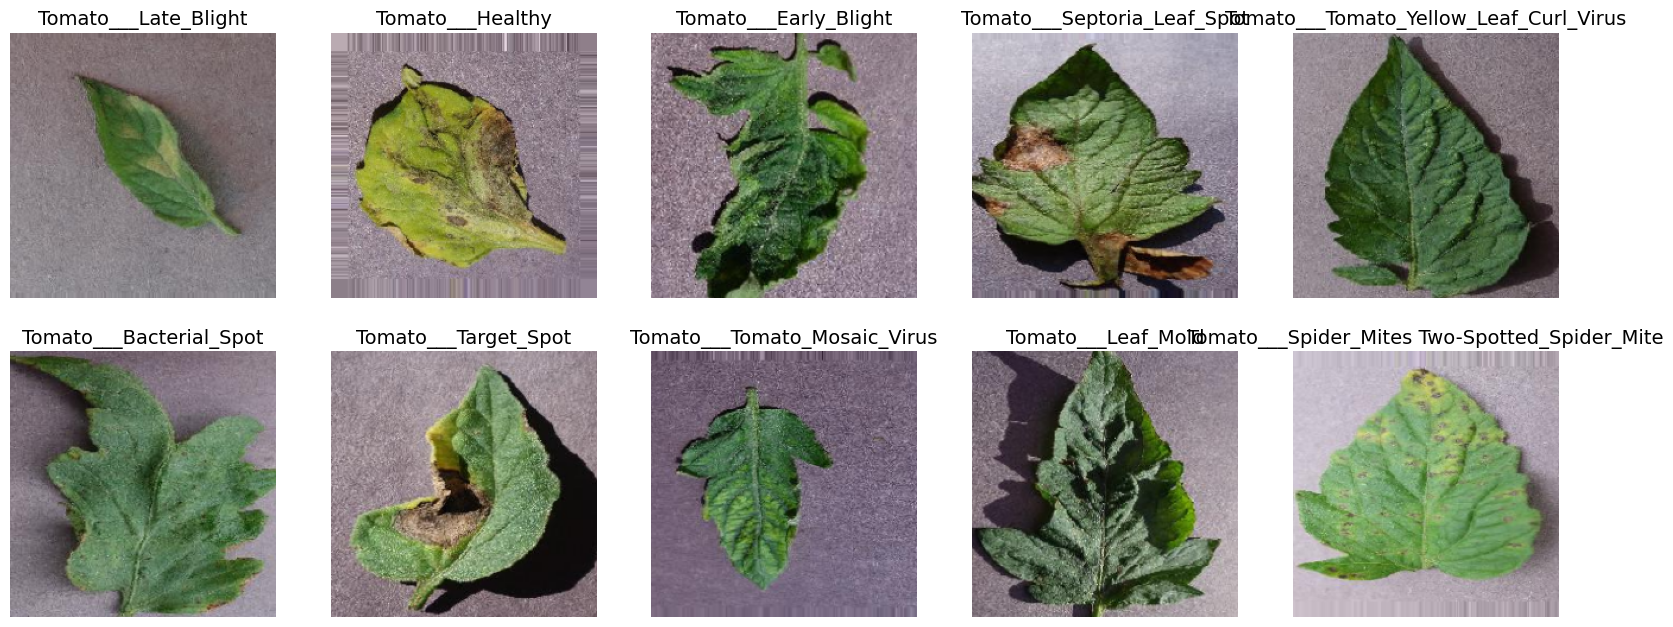

In [13]:
#vizualise the loaded images
def show_batch(image_batch, label_batch):
      fig = plt.figure(figsize=(20,20))
      fig.patch.set_facecolor('white')
      for n in range(10):
          ax = plt.subplot(5,5,n+1)
          plt.imshow(image_batch[n])
          plt.title(CLASS_NAMES[n].title(), fontsize=14)
          plt.axis('off')
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

# we begin with the 3X3 convolution classifier

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

#  Save best model every epoch
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('.')
#fit the model

# Train the model
# history = model.fit(train_generator epochs=50, batch_size=128, validation_data=validation_generator,ccallbacks=[early_stopper, reduce_lr])
history = model.fit(train_generator, 
                    epochs=14,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr])

Epoch 1/14
313/313 [==============================] - 175s 509ms/step - loss: 1.2559 - accuracy: 0.5859 - val_loss: 8.5707 - val_accuracy: 0.1890 - lr: 0.0010
Epoch 2/14
313/313 [==============================] - 132s 422ms/step - loss: 0.8131 - accuracy: 0.7206 - val_loss: 5.0212 - val_accuracy: 0.2180 - lr: 0.0010
Epoch 3/14
313/313 [==============================] - 131s 419ms/step - loss: 0.6631 - accuracy: 0.7741 - val_loss: 2.8057 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 4/14
313/313 [==============================] - 132s 421ms/step - loss: 0.5844 - accuracy: 0.8005 - val_loss: 3.9631 - val_accuracy: 0.3680 - lr: 0.0010
Epoch 5/14
313/313 [==============================] - 130s 415ms/step - loss: 0.4901 - accuracy: 0.8338 - val_loss: 2.1508 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 6/14
313/313 [==============================] - 131s 418ms/step - loss: 0.4444 - accuracy: 0.8487 - val_loss: 1.6344 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 7/14
313/313 [==========================

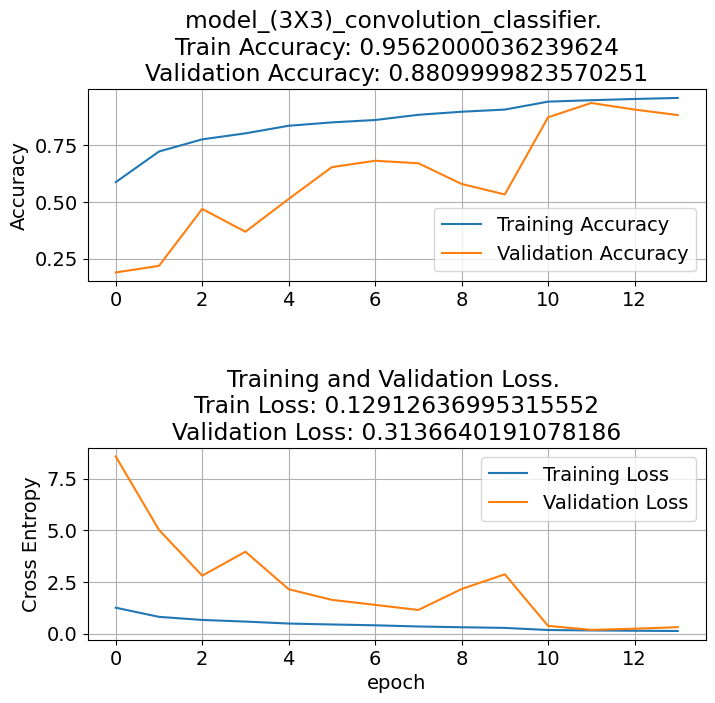

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'model_(3X3)_convolution_classifier. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [17]:
# save the model 
# saved_model = tf.keras.models.load_model('.')
# file_h5 = "model_(3X3)_convolution_classifier.h5"
# tf.keras.models.save_model(saved_model, file_h5)
model.save("model_(3X3)_convolution_classifier.h5")

# In this section we train the convolution classifier with the 5X5 filter in the first convolution layer

In [18]:
model = tf.keras.Sequential([
    layers.Conv2D(64, (5,5), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

#  Save best model every epoch
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('.')
#fit the model

# Train the model
# history = model.fit(train_generator epochs=50, batch_size=128, validation_data=validation_generator,ccallbacks=[early_stopper, reduce_lr])
history = model.fit(train_generator, 
                    epochs=14,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr])

Epoch 1/14
313/313 [==============================] - 142s 423ms/step - loss: 1.3580 - accuracy: 0.5465 - val_loss: 13.4451 - val_accuracy: 0.1310 - lr: 0.0010
Epoch 2/14
313/313 [==============================] - 131s 418ms/step - loss: 0.8559 - accuracy: 0.7114 - val_loss: 5.9281 - val_accuracy: 0.2240 - lr: 0.0010
Epoch 3/14
313/313 [==============================] - 131s 417ms/step - loss: 0.7168 - accuracy: 0.7510 - val_loss: 3.7649 - val_accuracy: 0.3740 - lr: 0.0010
Epoch 4/14
313/313 [==============================] - 132s 420ms/step - loss: 0.5826 - accuracy: 0.7982 - val_loss: 1.8401 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 5/14
313/313 [==============================] - 131s 418ms/step - loss: 0.5192 - accuracy: 0.8217 - val_loss: 1.7686 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 6/14
313/313 [==============================] - 132s 420ms/step - loss: 0.4732 - accuracy: 0.8347 - val_loss: 0.9035 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 7/14
313/313 [=========================

In [20]:
model.save("model_(5X5)_convolution_classifier.h5")

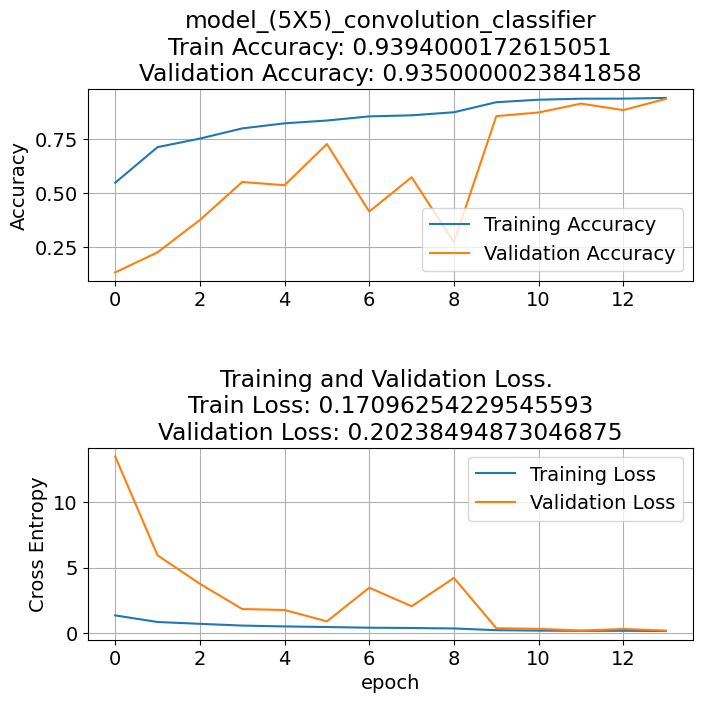

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'model_(5X5)_convolution_classifier\nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

# In this section we train the convolution classifier with the 7X7 filter in the first layer.

In [22]:
# Define the model architecture
model = tf.keras.Sequential([
    # First convolutional layer
    layers.Conv2D(64, (7, 7), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Second convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Third convolutional layer
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Flatten the output of the convolutional layers
    layers.Flatten(),
    # Dense layer with 512 units
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    # Output layer with 10 units (one for each class)
    layers.Dense(10, activation='softmax')
])

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

#  Save best model every epoch
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('.')
#fit the model

# Train the model
# history = model.fit(train_generator epochs=50, batch_size=128, validation_data=validation_generator,ccallbacks=[early_stopper, reduce_lr])
history = model.fit(train_generator, 
                    epochs=14,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr])

Epoch 1/14
313/313 [==============================] - 124s 382ms/step - loss: 0.8954 - accuracy: 0.7166 - val_loss: 9.5032 - val_accuracy: 0.1210 - lr: 0.0010
Epoch 2/14
313/313 [==============================] - 119s 379ms/step - loss: 0.4955 - accuracy: 0.8266 - val_loss: 2.2857 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 3/14
313/313 [==============================] - 119s 380ms/step - loss: 0.3540 - accuracy: 0.8764 - val_loss: 2.5595 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 4/14
313/313 [==============================] - 119s 381ms/step - loss: 0.2696 - accuracy: 0.9036 - val_loss: 3.8430 - val_accuracy: 0.3910 - lr: 0.0010
Epoch 5/14
313/313 [==============================] - 119s 381ms/step - loss: 0.2269 - accuracy: 0.9194 - val_loss: 0.6744 - val_accuracy: 0.8120 - lr: 0.0010
Epoch 6/14
313/313 [==============================] - 118s 376ms/step - loss: 0.3453 - accuracy: 0.8817 - val_loss: 1.5370 - val_accuracy: 0.6620 - lr: 0.0010
Epoch 7/14
313/313 [==========================

In [24]:
model.save("model_(7X7)_convolution_classifier.h5")

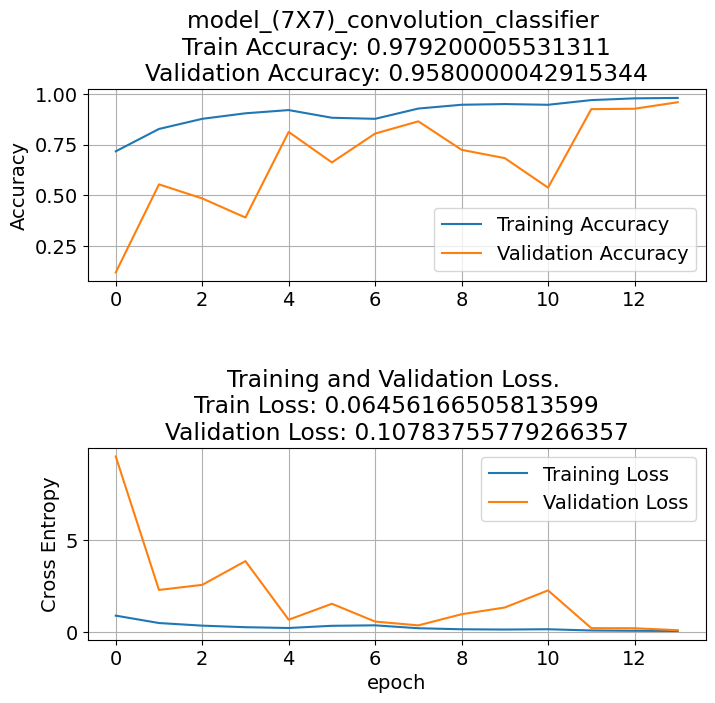

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'model_(7X7)_convolution_classifier \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()